<a href="https://colab.research.google.com/github/Shan-Niit/story/blob/main/Decision_tree_and_random_forest_auto_exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import Libraries

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

#Import Data

In [23]:
data = pd.read_csv("Decision_Tree_Regression.csv")
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

# Split the data

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

#Decision Tree :


#Train the data with Decision Tree

In [25]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state = 0)
regressor.fit(X_train, y_train)

DecisionTreeRegressor(random_state=0)

In [26]:
y_pred = regressor.predict(X_test)
y_pred_train = regressor.predict(X_train)

#Graph the data

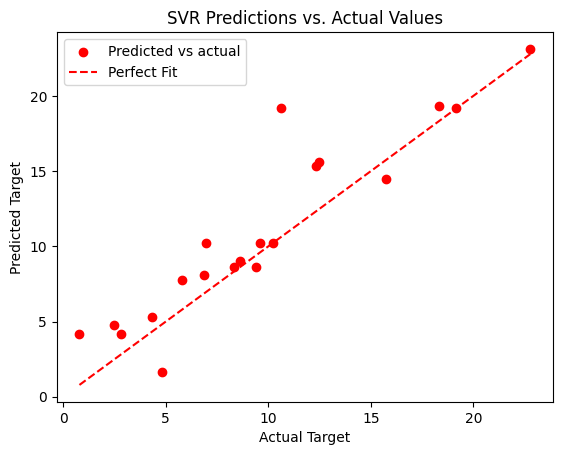

In [27]:
#Show the predictions with the actual values (y_test)
plt.scatter(y_test, y_pred, color = "red", label = "Predicted vs actual")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='dashed', label="Perfect Fit")
plt.xlabel("Actual Target")
plt.ylabel("Predicted Target")
plt.title("SVR Predictions vs. Actual Values")
plt.legend()
plt.show()

#Score the data

In [28]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

print("R2 Score on the training: ", r2_score(y_train, y_pred_train))
print("R2 Score on the test: ", r2_score(y_test, y_pred))
print("Mean Squared Error: ", mean_squared_error(y_test, y_pred))
print("Mean Absolute Error: ", mean_absolute_error(y_test, y_pred))
print("Root Mean Squared Error: ", np.sqrt(mean_squared_error(y_test, y_pred)))

R2 Score on the training:  1.0
R2 Score on the test:  0.781031510361234
Mean Squared Error:  7.147643711470847
Mean Absolute Error:  1.8711726106441806
Root Mean Squared Error:  2.6735077541445147


##Because the model is a Decision Tree, it's overfit on the training data (the R2 score on the data is 1). But the r2 score on the testing data is 78%, So I'll continue with a random forest.

#Train the Data (Random Forest):

In [29]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

# Define possible values for n_estimators
param_grid = {'n_estimators': [10, 50, 100, 200, 500]}

# Create the model
rf = RandomForestRegressor(random_state=0)

# Perform Grid Search
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='r2', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get the best number of trees
best_n_estimators = grid_search.best_params_['n_estimators']
print(f"Best number of trees: {best_n_estimators}")


Best number of trees: 500


In [30]:
rf = RandomForestRegressor(n_estimators=best_n_estimators, random_state=0)
rf.fit(X_train, y_train)

RandomForestRegressor(n_estimators=500, random_state=0)

In [31]:
y_pred = rf.predict(X_test)
y_pred_train = rf.predict(X_train)

#Graph the data (Random Forest)

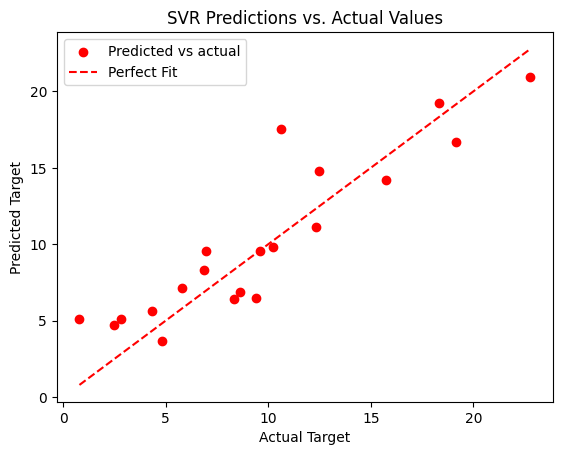

In [32]:
#Show the predictions with the actual values (y_test)
plt.scatter(y_test, y_pred, color = "red", label = "Predicted vs actual")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='dashed', label="Perfect Fit")
plt.xlabel("Actual Target")
plt.ylabel("Predicted Target")
plt.title("SVR Predictions vs. Actual Values")
plt.legend()
plt.show()

#Score the data (Random Forest)

In [33]:

print("R2 Score on the training: ", r2_score(y_train, y_pred_train))
print("R2 Score on the test: ", r2_score(y_test, y_pred))
print("Mean Squared Error: ", mean_squared_error(y_test, y_pred))
print("Mean Absolute Error: ", mean_absolute_error(y_test, y_pred))
print("Root Mean Squared Error: ", np.sqrt(mean_squared_error(y_test, y_pred)))

R2 Score on the training:  0.9773981344457641
R2 Score on the test:  0.8090963252048784
Mean Squared Error:  6.231542505942618
Mean Absolute Error:  2.0420090358217164
Root Mean Squared Error:  2.4963057717240127


We can see that the model is not overfitted this time because the R2 on the training data is less than 100% and R2 on the test is 81%, almost 3% more than the Decision Tree. The Random Forest model performs better than the Decision Tree model because it has a lower Mean Squared Error (MSE) and Root Mean Squared Error (RMSE), indicating more accurate predictions. However, the Mean Absolute Error (MAE) is slightly higher, meaning the average absolute difference between predicted and actual values is slightly worse, but overall, the Random Forest generalizes better by reducing variance and improving stability.